In [1]:
from random import random, sample
from astropy import coordinates
from astroquery.esa.hubble import ESAHubbleClass
from astropy.io import fits
import matplotlib.pyplot as plt
import os
import zipfile 
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
import gzip
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [4]:
%run 2204A_Görüntü_İşleme.ipynb

Filename: C:\Users\hp\Desktop\04A\İşlenmemiş\ib1b92lrq_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     798   ()      
  1  SCI           1 ImageHDU        93   (510, 538)   float32   
  2  WHT           1 ImageHDU        45   (510, 538)   float32   
  3  CTX           1 ImageHDU        40   (510, 538)   int32   
  4  HDRTAB        1 BinTableHDU    559   1R x 275C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, K, 15A, 4A, 1A, 4A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, K, 8A, 23A, D, D, D, D, K, K, 8A, 23A, 9A, 19A, 1A, K, D, D, D, K, K, K, K, 23A, D, D, D, D, K, K, 4A, 3A, 4A, L, D, D, D, 23A, 1A, K, D, D, D, 4A, 1A, 12A, 12A, 8A, 23A, D, D, 10A, 10A, D, D, D, 4A, 3A, 3A, 4A, 8A, 7A, D, K, D, 6A, 9A, 8A, D, D, 4A, 18A, 3A, K, 5A, 4A, D, 13A, 8A, 4A, 3A, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, L, 1A, 4A, D, 3A, 6A, D, D, D, D, D, 23A, D, D, D, D, D, 1A, K, K, K, K, D, 3A, K, D, 5A, 7A, D, D, D, D, D, D, D, D,

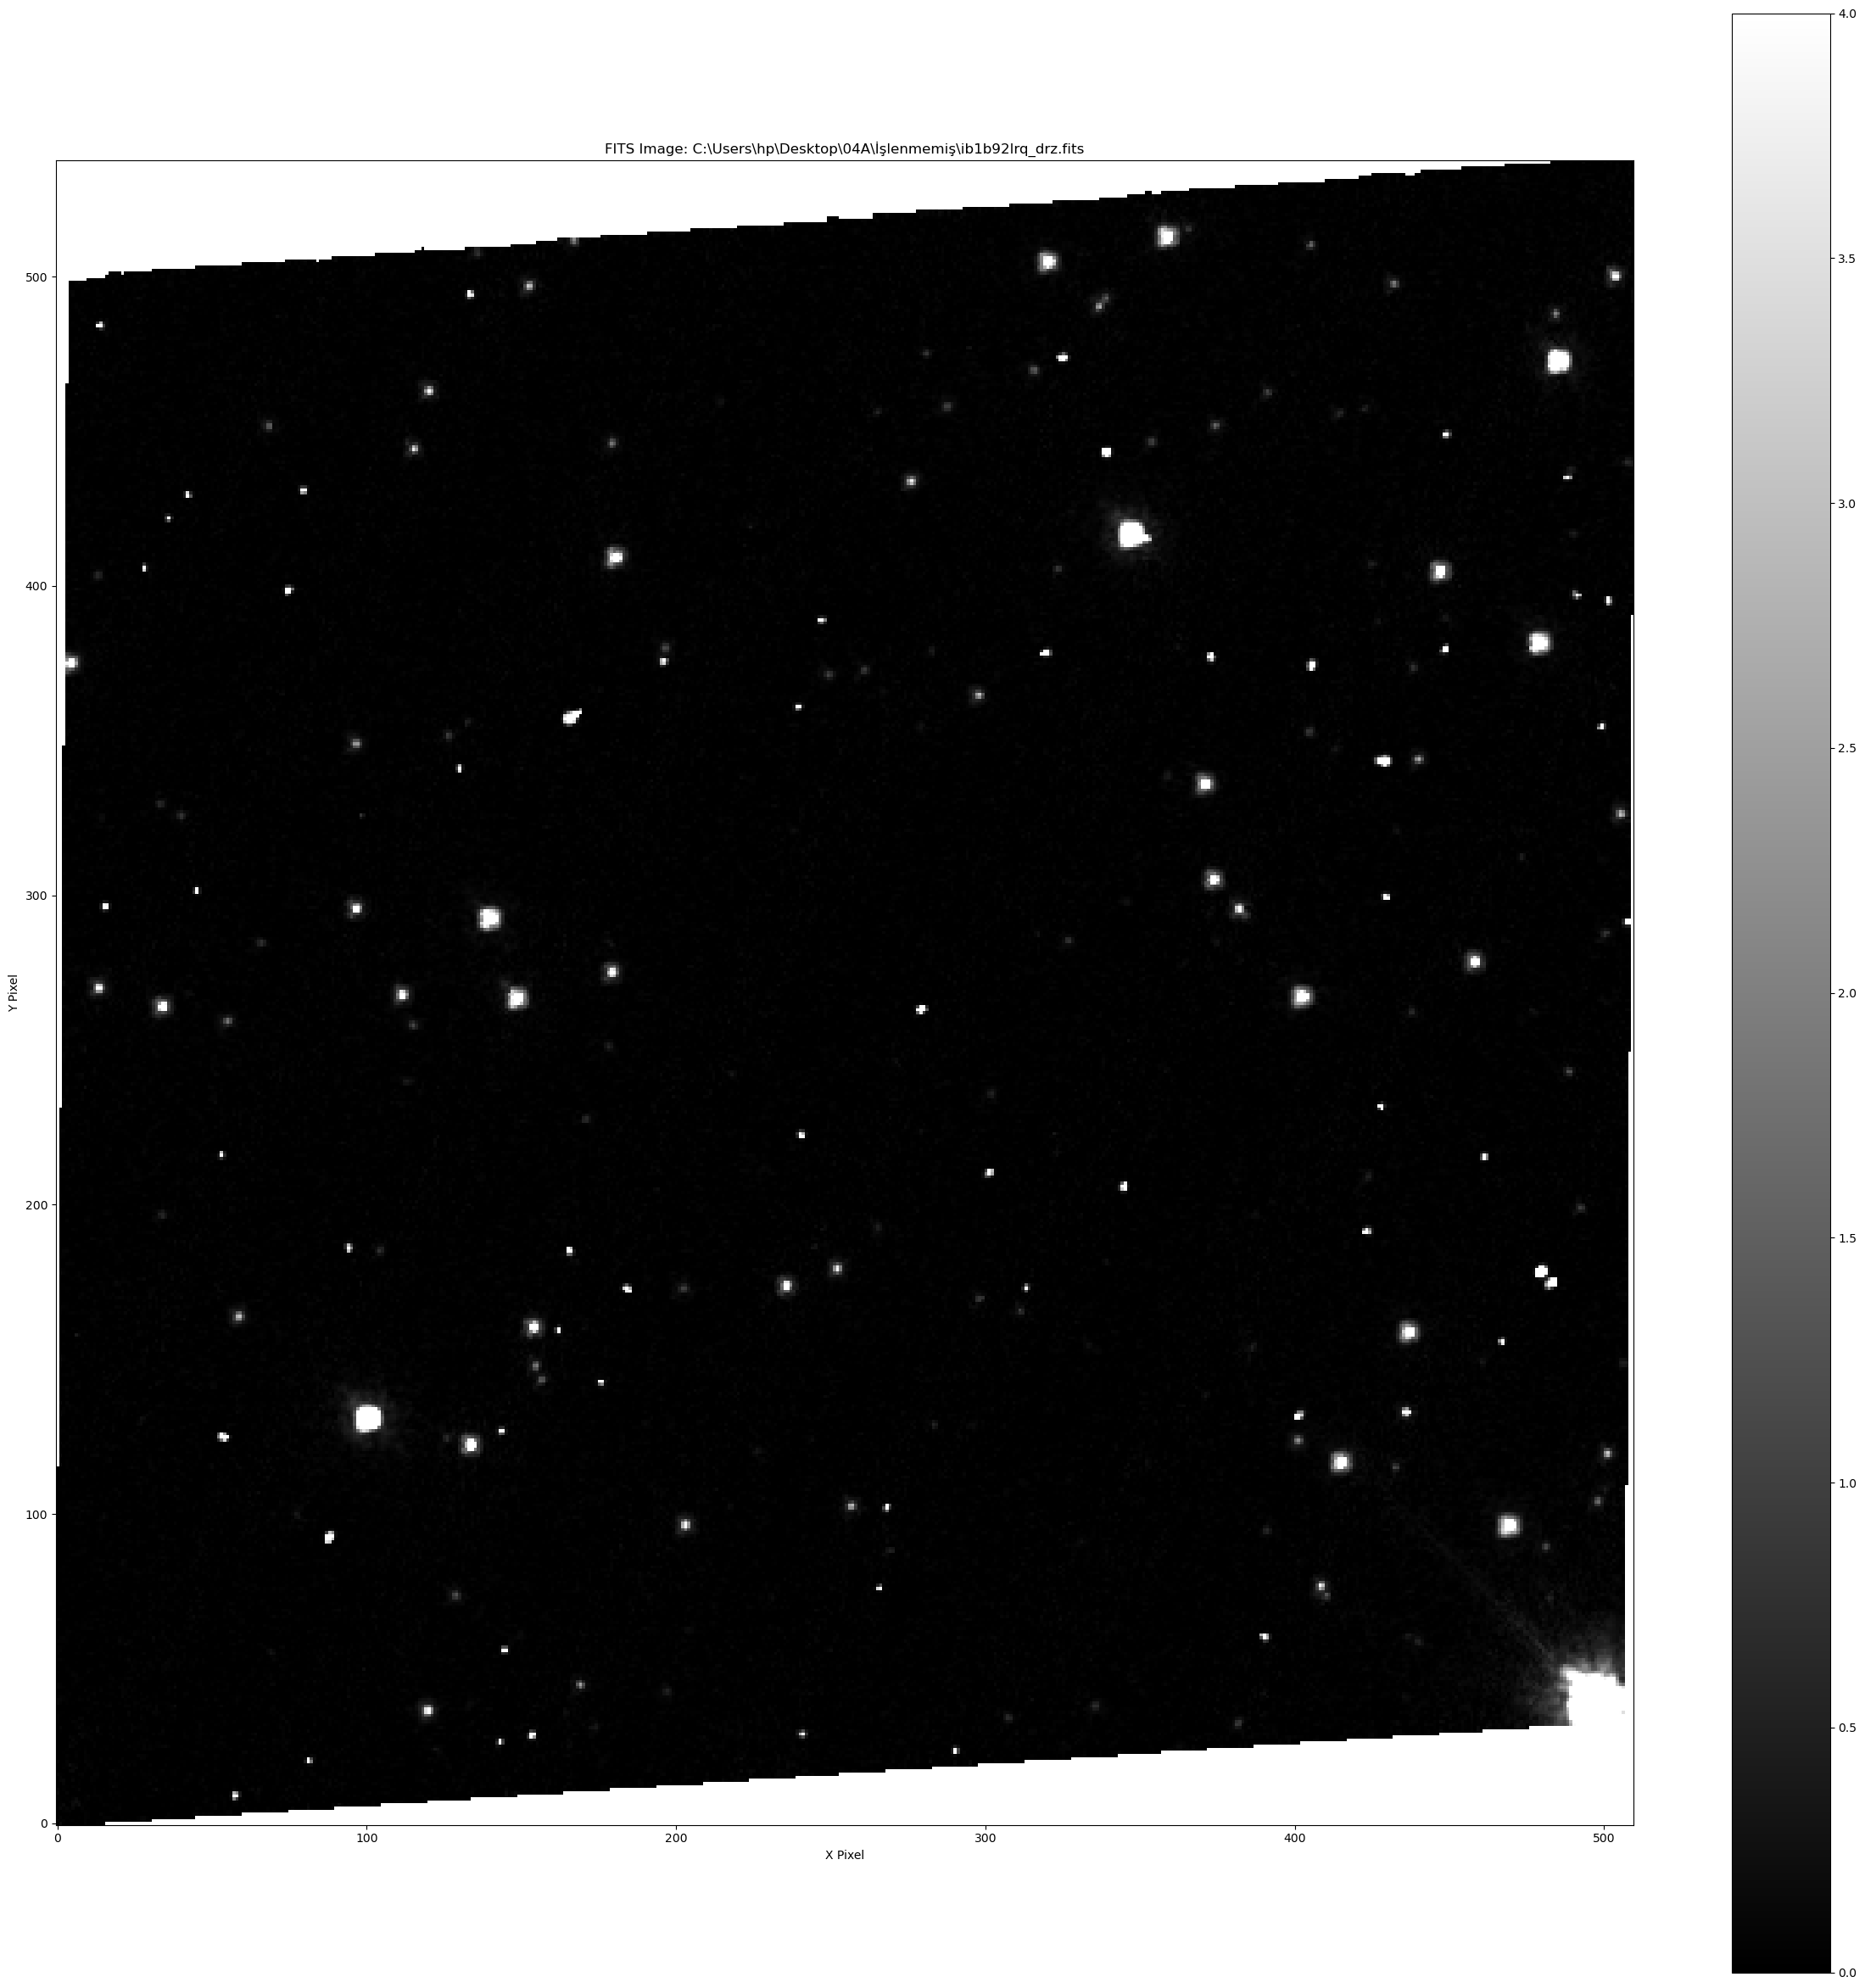

array([[-0.02708791,  0.18407398,  0.02163269, ...,         nan,
                nan,         nan],
       [ 0.09755884,  0.03131164,  0.07107994, ...,         nan,
                nan,         nan],
       [-0.00396148,  0.07360971,  0.00530864, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,  0.03498473,
         0.04006122, -0.0477653 ],
       [        nan,         nan,         nan, ...,  0.01507373,
         0.1043544 , -0.01755662],
       [        nan,         nan,         nan, ...,  0.02336898,
         0.05258242, -0.0158721 ]], dtype=float32)

In [9]:
aaa = []

def view_fits_image(file_path):
    """View the image stored in a FITS file.

    Parameters:
        file_path (str): The path to the FITS file.
    """
    img = []
    try:
        # Open the FITS file
        with fits.open(file_path) as hdul:
            # Display the structure of the FITS file
            hdul.info()

            # Access the image data (usually in the first extension, index 1)
            image_data = hdul[1].data if len(hdul) > 1 else hdul[0].data
            #image_data[np.isnan(image_data)] = 0
            #image_data[image_data < 40000] = 0
            #print(np.mean(image_data))
            # Check if image data is present
            print(image_data)
            
            if image_data is None:
                print("No image data found in the FITS file.")
                return
            # Plot the image dat
            plt.figure(figsize=(30,30))
            plt.imshow((image_data), cmap='gray', origin='lower', vmin=0, vmax=4)
            plt.colorbar()
            plt.title(f"FITS Image: {file_path}")
            plt.xlabel("X Pixel")
            plt.ylabel("Y Pixel")
            plt.show()
            return image_data
    except Exception as e:
        print(f"An error occurred while reading the FITS file: {e}")
    
# Example usageC:\Users\hp\Desktop\mastDownload\HST\hst_8698_25_wfpc2_pc_f606w_u65l25
file_path = "C:\\Users\\hp\\Desktop\\04A\\İşlenmemiş\\ib1b92lrq_drz.fits"
view_fits_image(file_path)

In [20]:
secs = process_image(img, 256)

TypeError: process_image() takes 1 positional argument but 2 were given

Filename: C:\Users\hp\Desktop\04A\İşlenmemiş\eski\jckz03010_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1088   ()      
  1  SCI           1 ImageHDU        81   (4307, 4326)   float32   
  2  WHT           1 ImageHDU        44   (4307, 4326)   float32   
  3  CTX           1 ImageHDU        37   (4307, 4326)   int32   
  4  HDRTAB        1 BinTableHDU    593   24R x 292C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, D, K, 4A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, 8A, 23A, D, D, D, D, K, K, K, 8A, K, 23A, 9A, 20A, K, 4A, K, D, K, K, K, K, 23A, D, D, D, D, K, K, 3A, 3A, 4A, 4A, L, D, D, D, 3A, 1A, K, D, D, D, D, D, 4A, 4A, 12A, 12A, 23A, 8A, 23A, 10A, 10A, D, D, 3A, 3A, 23A, 4A, 8A, 7A, 23A, D, K, D, 6A, 9A, 8A, D, D, L, 4A, 18A, 3A, K, 5A, 7A, 3A, D, 13A, 8A, 4A, 3A, L, K, L, K, L, K, K, D, D, D, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, 23A, L, 1A, 3A, 6A, D, 3A, 6A, K, D, D, D, D, D, D, D,

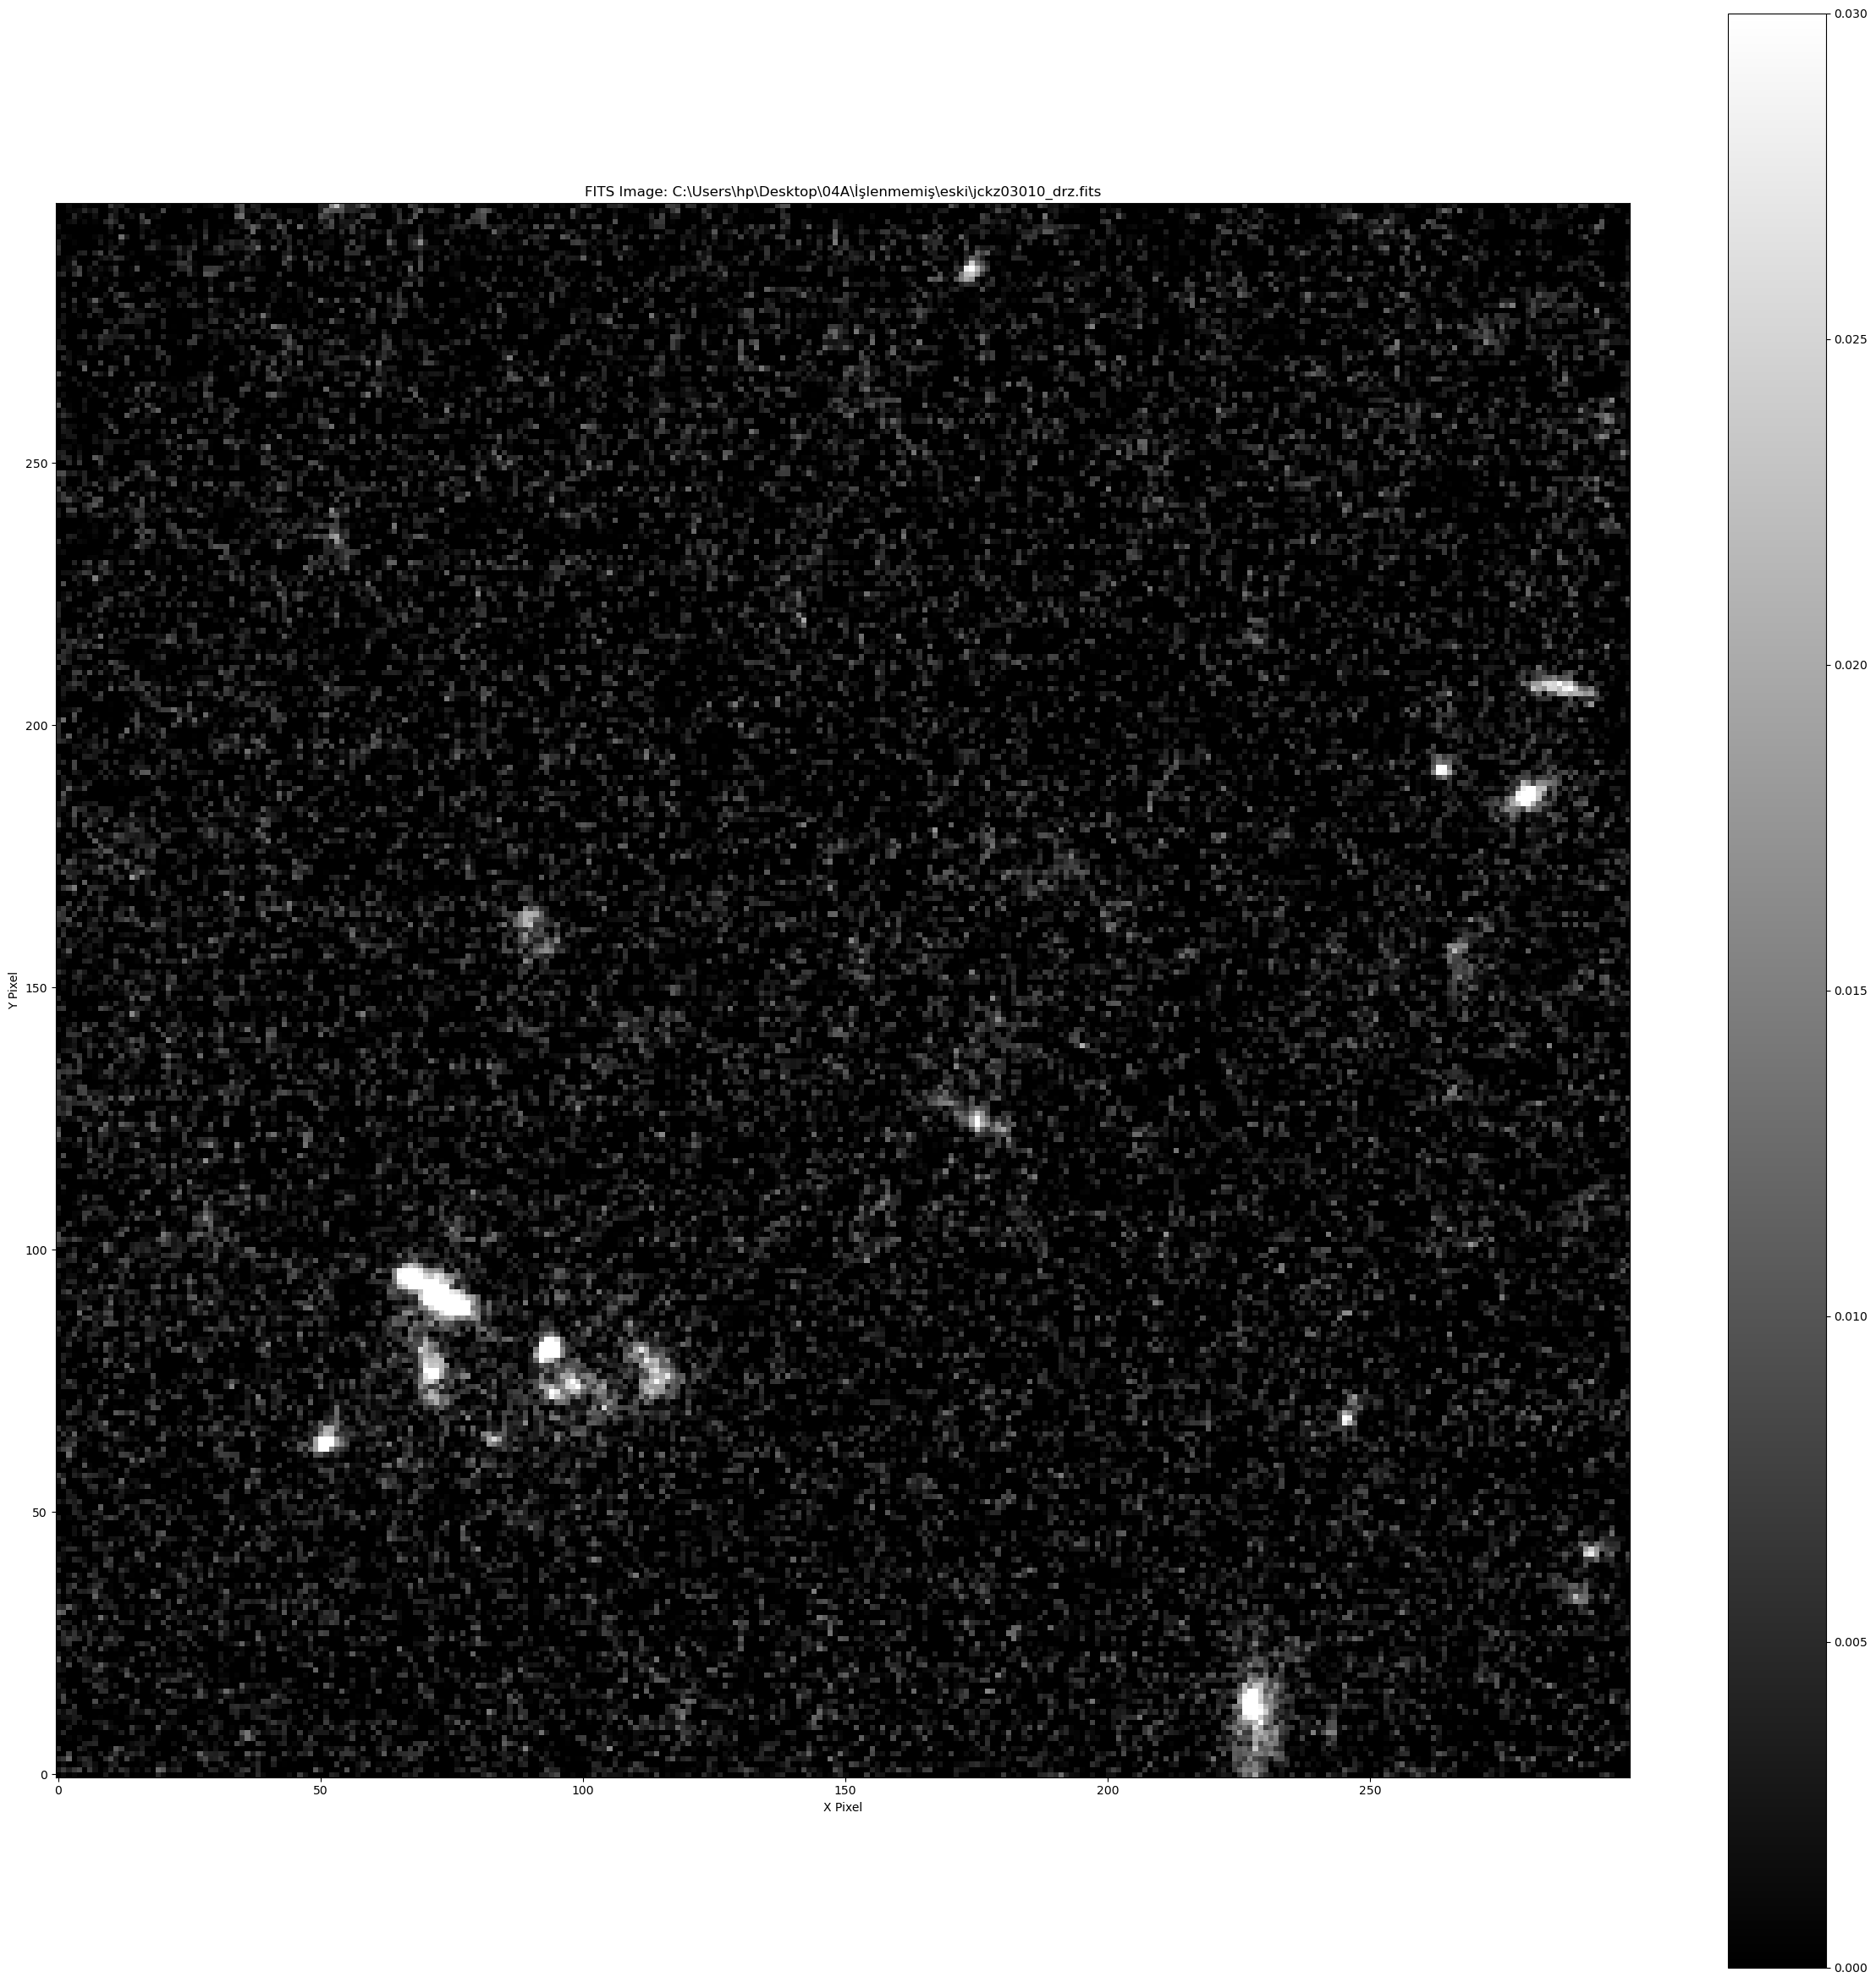

In [9]:
def view_fits_image(file_path):
    """View the image stored in a FITS file.

    Parameters:
        file_path (str): The path to the FITS file.
    """
    img = []
    try:
        # Open the FITS file
        with fits.open(file_path) as hdul:
            # Display the structure of the FITS file
            hdul.info()

            # Access the image data (usually in the first extension, index 1)
            image_data = hdul[1].data if len(hdul) > 1 else hdul[0].data
            image_data[np.isnan(image_data)] = 0
            image_data[image_data <0] = 0
            #print(np.mean(image_data))
            # Check if image data is present
            print(image_data)
            
            if image_data is None:
                print("No image data found in the FITS file.")
                return
            # Plot the image dat
            plt.figure(figsize=(30,30))
            plt.imshow((image_data)[200:500, 200:500], cmap='gray', origin='lower', vmin=0.0, vmax=0.03)
            plt.colorbar()
            plt.title(f"FITS Image: {file_path}")
            plt.xlabel("X Pixel")
            plt.ylabel("Y Pixel")
            plt.show()
            return image_data
    except Exception as e:
        print(f"An error occurred while reading the FITS file: {e}")
    
# Example usageC:\Users\hp\Desktop\mastDownload\HST\hst_8698_25_wfpc2_pc_f606w_u65l25
file_path = "C:\\Users\\hp\\Desktop\\04A\\İşlenmemiş\\eski\\jckz03010_drz.fits"
img = view_fits_image(file_path)

In [4]:
len(img[img < 0])

8156054

In [5]:
np.max(img)

0.21277036

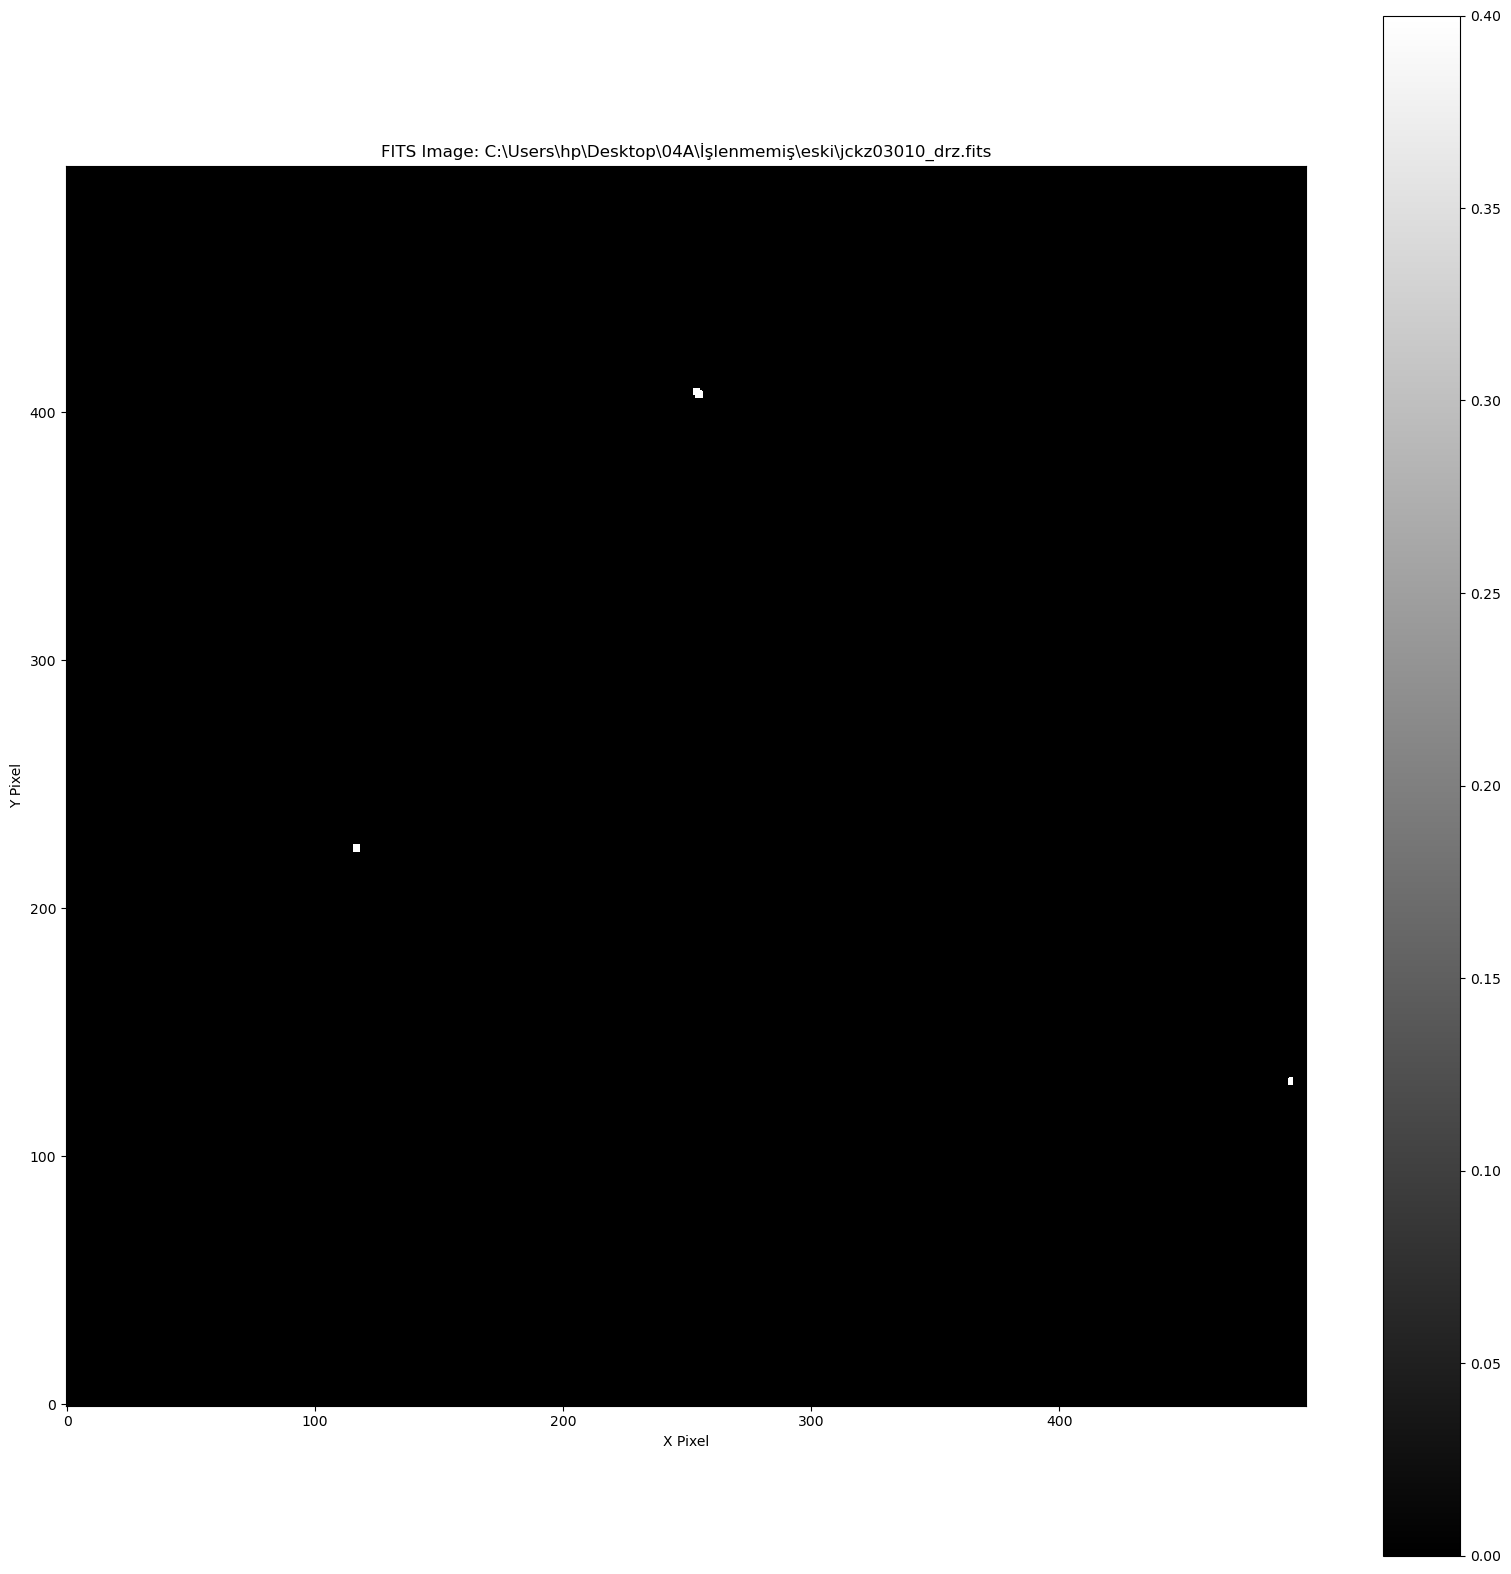

In [6]:
img[img < (0.21277036 / 2)] = 0
img = img * 1e9

plt.figure(figsize=(20,20))
plt.imshow((img), cmap='gray', origin='lower', vmin=0.0, vmax=0.4)
plt.colorbar()
plt.title(f"FITS Image: {file_path}")
plt.xlabel("X Pixel")
plt.ylabel("Y Pixel")
plt.show()

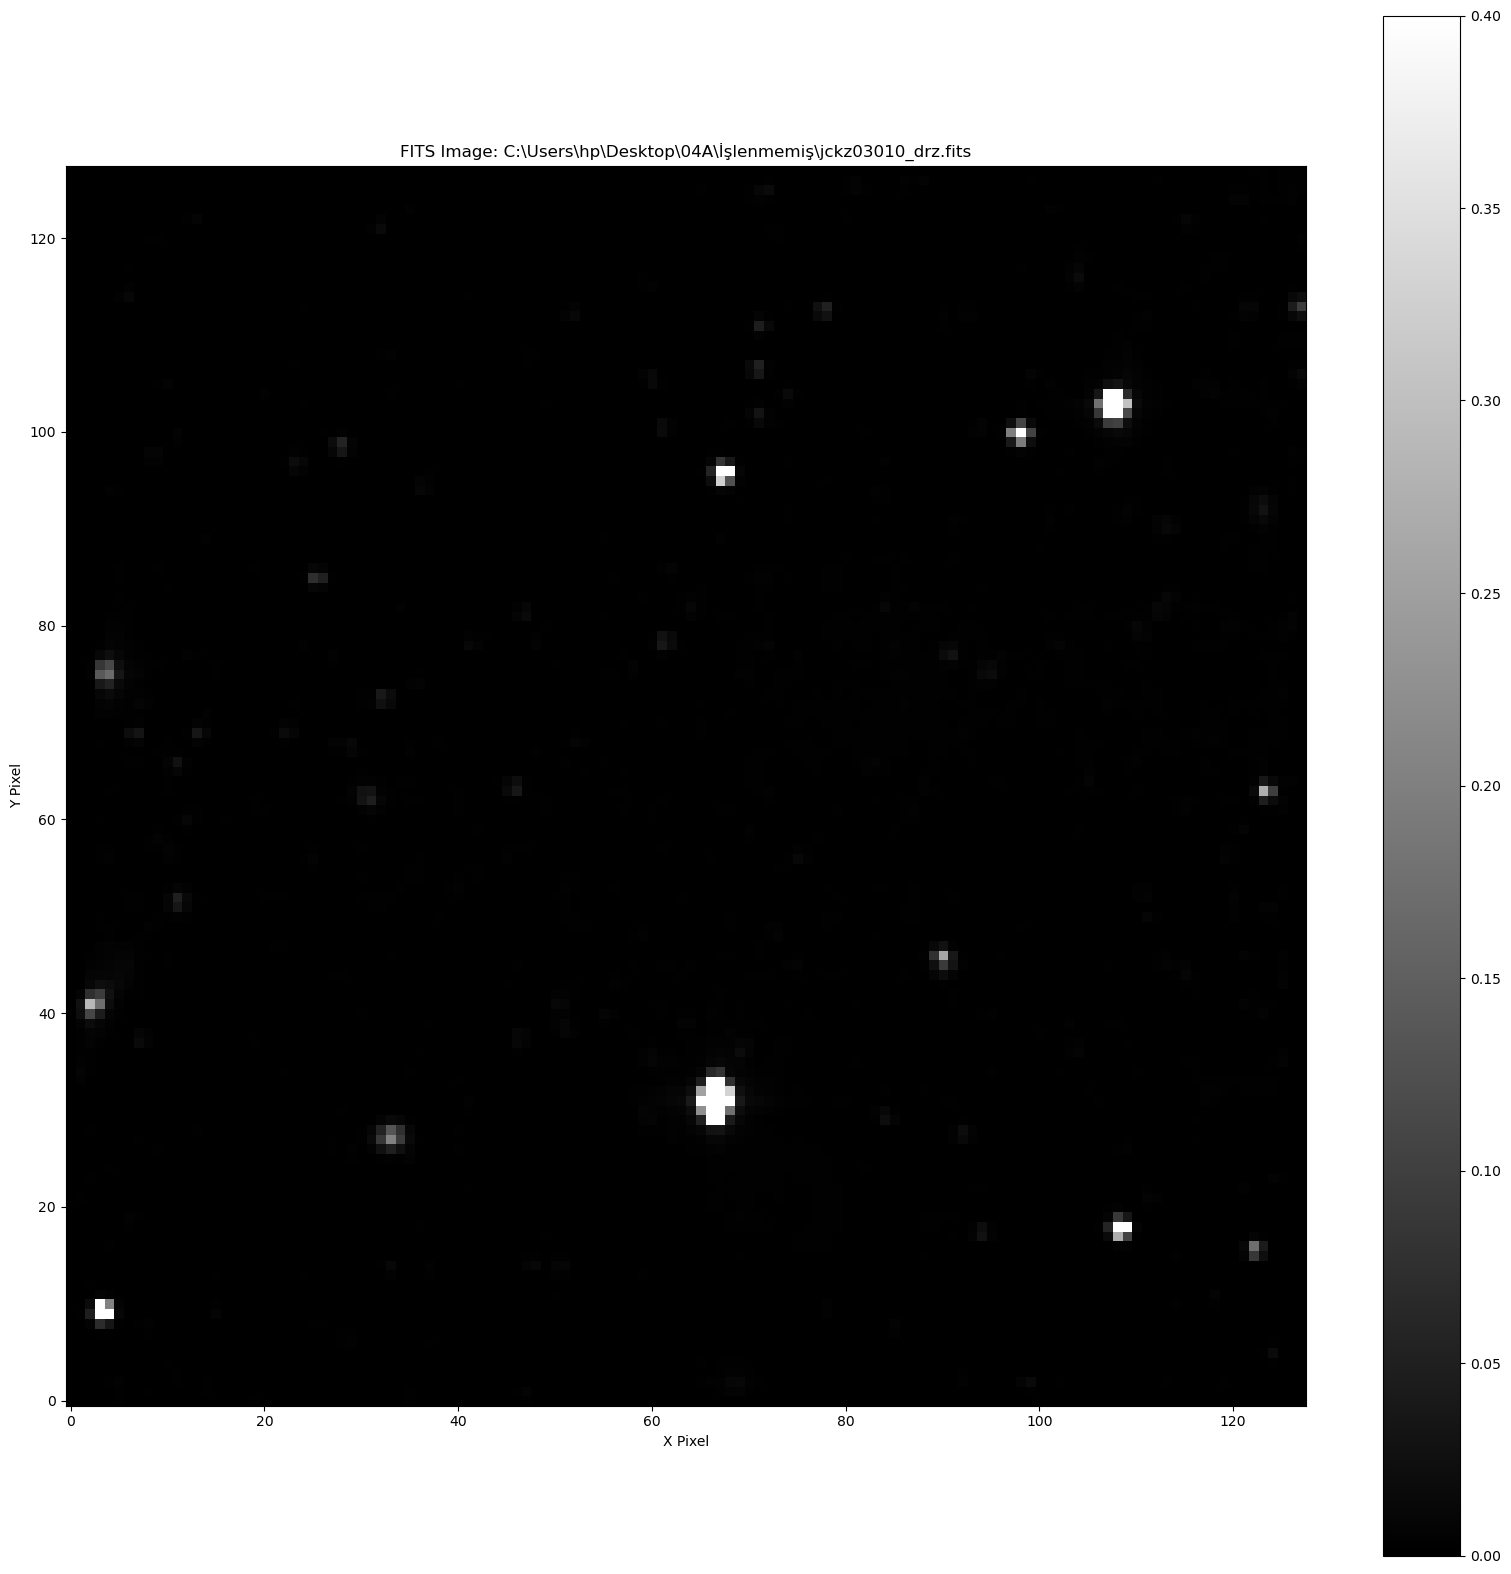

In [17]:
plt.figure(figsize=(20,20))
plt.imshow((limg), cmap='gray', origin='lower', vmin=0.0, vmax=0.4)
plt.colorbar()
plt.title(f"FITS Image: {file_path}")
plt.xlabel("X Pixel")
plt.ylabel("Y Pixel")
plt.show()

In [78]:
from skimage.transform import resize

In [107]:
img = resize(img, (128, 128))

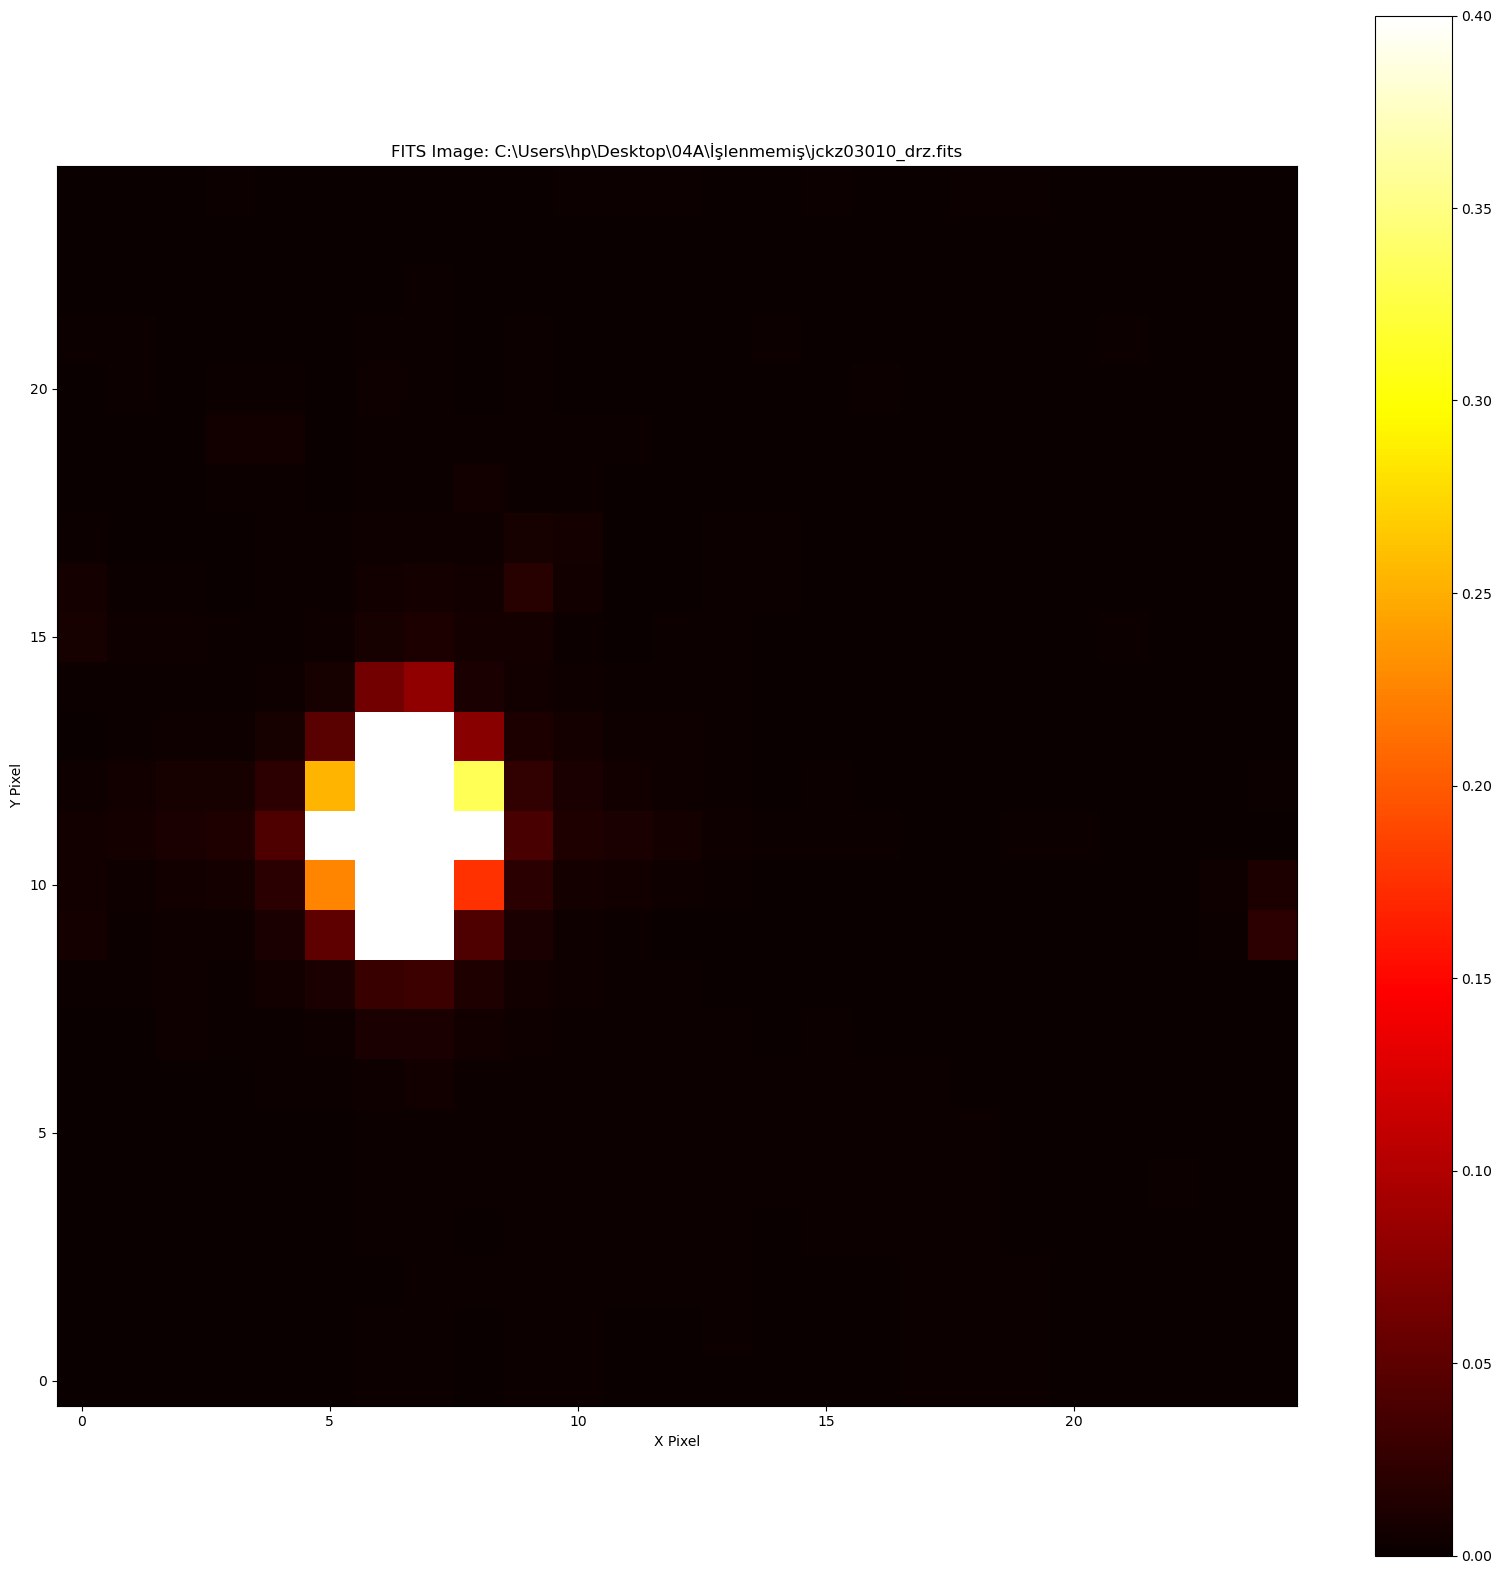

In [125]:
plt.figure(figsize=(20,20))
plt.imshow((img)[20:45, 60:85], cmap='hot', origin='lower', vmin=0.0, vmax=0.4)
plt.colorbar()
plt.title(f"FITS Image: {file_path}")
plt.xlabel("X Pixel")
plt.ylabel("Y Pixel")
plt.show()

hubble = (img)[20:45, 60:85]
tug = secs[54]

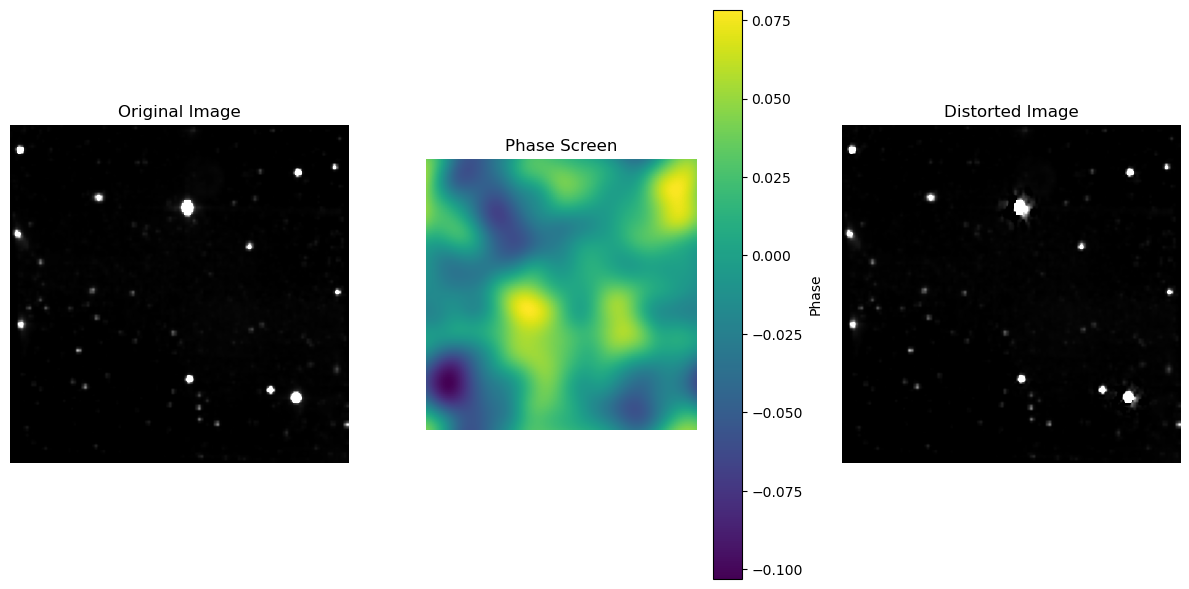

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from aotools.turbulence import phasescreen
from scipy.ndimage import gaussian_filter
from PIL import Image

def generate_phase_screen(size, r0, L0, l0, pixel_scale):
    """
    Generate a phase screen using ft_phase_screen.

    Parameters:
        size (int): Size of the phase screen in pixels (NxN).
        r0 (float): Fried parameter (meters).
        L0 (float): Outer scale of turbulence (meters).
        l0 (float): Inner scale of turbulence (meters).
        pixel_scale (float): Scale of each pixel in meters.

    Returns:
        np.ndarray: Phase screen.
    """
    return phasescreen.ft_phase_screen(r0, size, pixel_scale,L0=L0, l0=l0, seed=234)

def apply_turbulence_fft(image, phase_screen):
    """
    Apply turbulence to an image in the Fourier domain using the given phase screen.

    Parameters:
        image (np.ndarray): 2D image to be distorted.
        phase_screen (np.ndarray): Phase screen to apply.

    Returns:
        np.ndarray: Distorted image.
    """
    # Compute FFT of the image
    image_fft = np.fft.fft2(image)
    image_fft = np.fft.fftshift(image_fft)  # Shift zero-frequency component to the center

    # Create the complex phase screen
    phase = np.exp(1j * phase_screen)

    # Apply the phase screen in the Fourier domain
    distorted_fft = image_fft * phase

    # Inverse FFT to get the distorted image
    distorted_fft = np.fft.ifftshift(distorted_fft)  # Inverse shift
    distorted_image = np.fft.ifft2(distorted_fft).real

    return distorted_image

# Load an example image (convert to grayscale for simplicity)
image_path = "example_image.jpg"  # Replace with your image path
image = limg
# Normalize to [0, 1]

# Parameters
size = max(image.shape)  # Phase screen size should cover the image
r0 = 1  # Fried parameter in meters
L0 = 10.0  # Outer scale of turbulence in meters
l0 = 0.03  # Inner scale of turbulence in meters
pixel_scale = 0.001  # Pixel scale in meters (arbitrary, depends on setup)

# Generate phase screen
phase_screen = generate_phase_screen(size, r0, L0, l0, pixel_scale)

# Apply turbulence to the image
distorted_image = apply_turbulence_fft(image, phase_screen[:image.shape[0], :image.shape[1]])

# Plot results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray", vmin=0.0, vmax = 0.1)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Phase Screen")
plt.imshow(phase_screen, cmap="viridis")
plt.colorbar(label="Phase")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Distorted Image")
plt.imshow(distorted_image, cmap="gray", vmin = 0.0, vmax = 0.1)
plt.axis("off")

plt.tight_layout()
plt.show()


In [18]:
plt.figure(figsize=(20,20))
plt.imshow(secs[54][231:359, 100:228], cmap='hot', origin='lower', vmin=500, vmax=2000)
plt.colorbar()
plt.title(f"FITS Image: {file_path}")
plt.xlabel("X Pixel")
plt.ylabel("Y Pixel")
plt.show()

NameError: name 'secs' is not defined

<Figure size 2000x2000 with 0 Axes>

SyntaxError: EOL while scanning string literal (3796427340.py, line 38)

Filename: C:\Users\hp\Desktop\04A\TUG\915\Image\2017-05-03\T100_915_DATE_2017-05-03_TIME_23.42.30.99_light.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   (2048, 2048)   int16 (rescales to uint16)   
[[445 471 469 ... 500 469 453]
 [484 493 499 ... 480 477 481]
 [496 505 494 ... 510 494 489]
 ...
 [505 497 476 ... 481 482 494]
 [491 482 506 ... 487 471 500]
 [463 471 498 ... 495 479 468]]


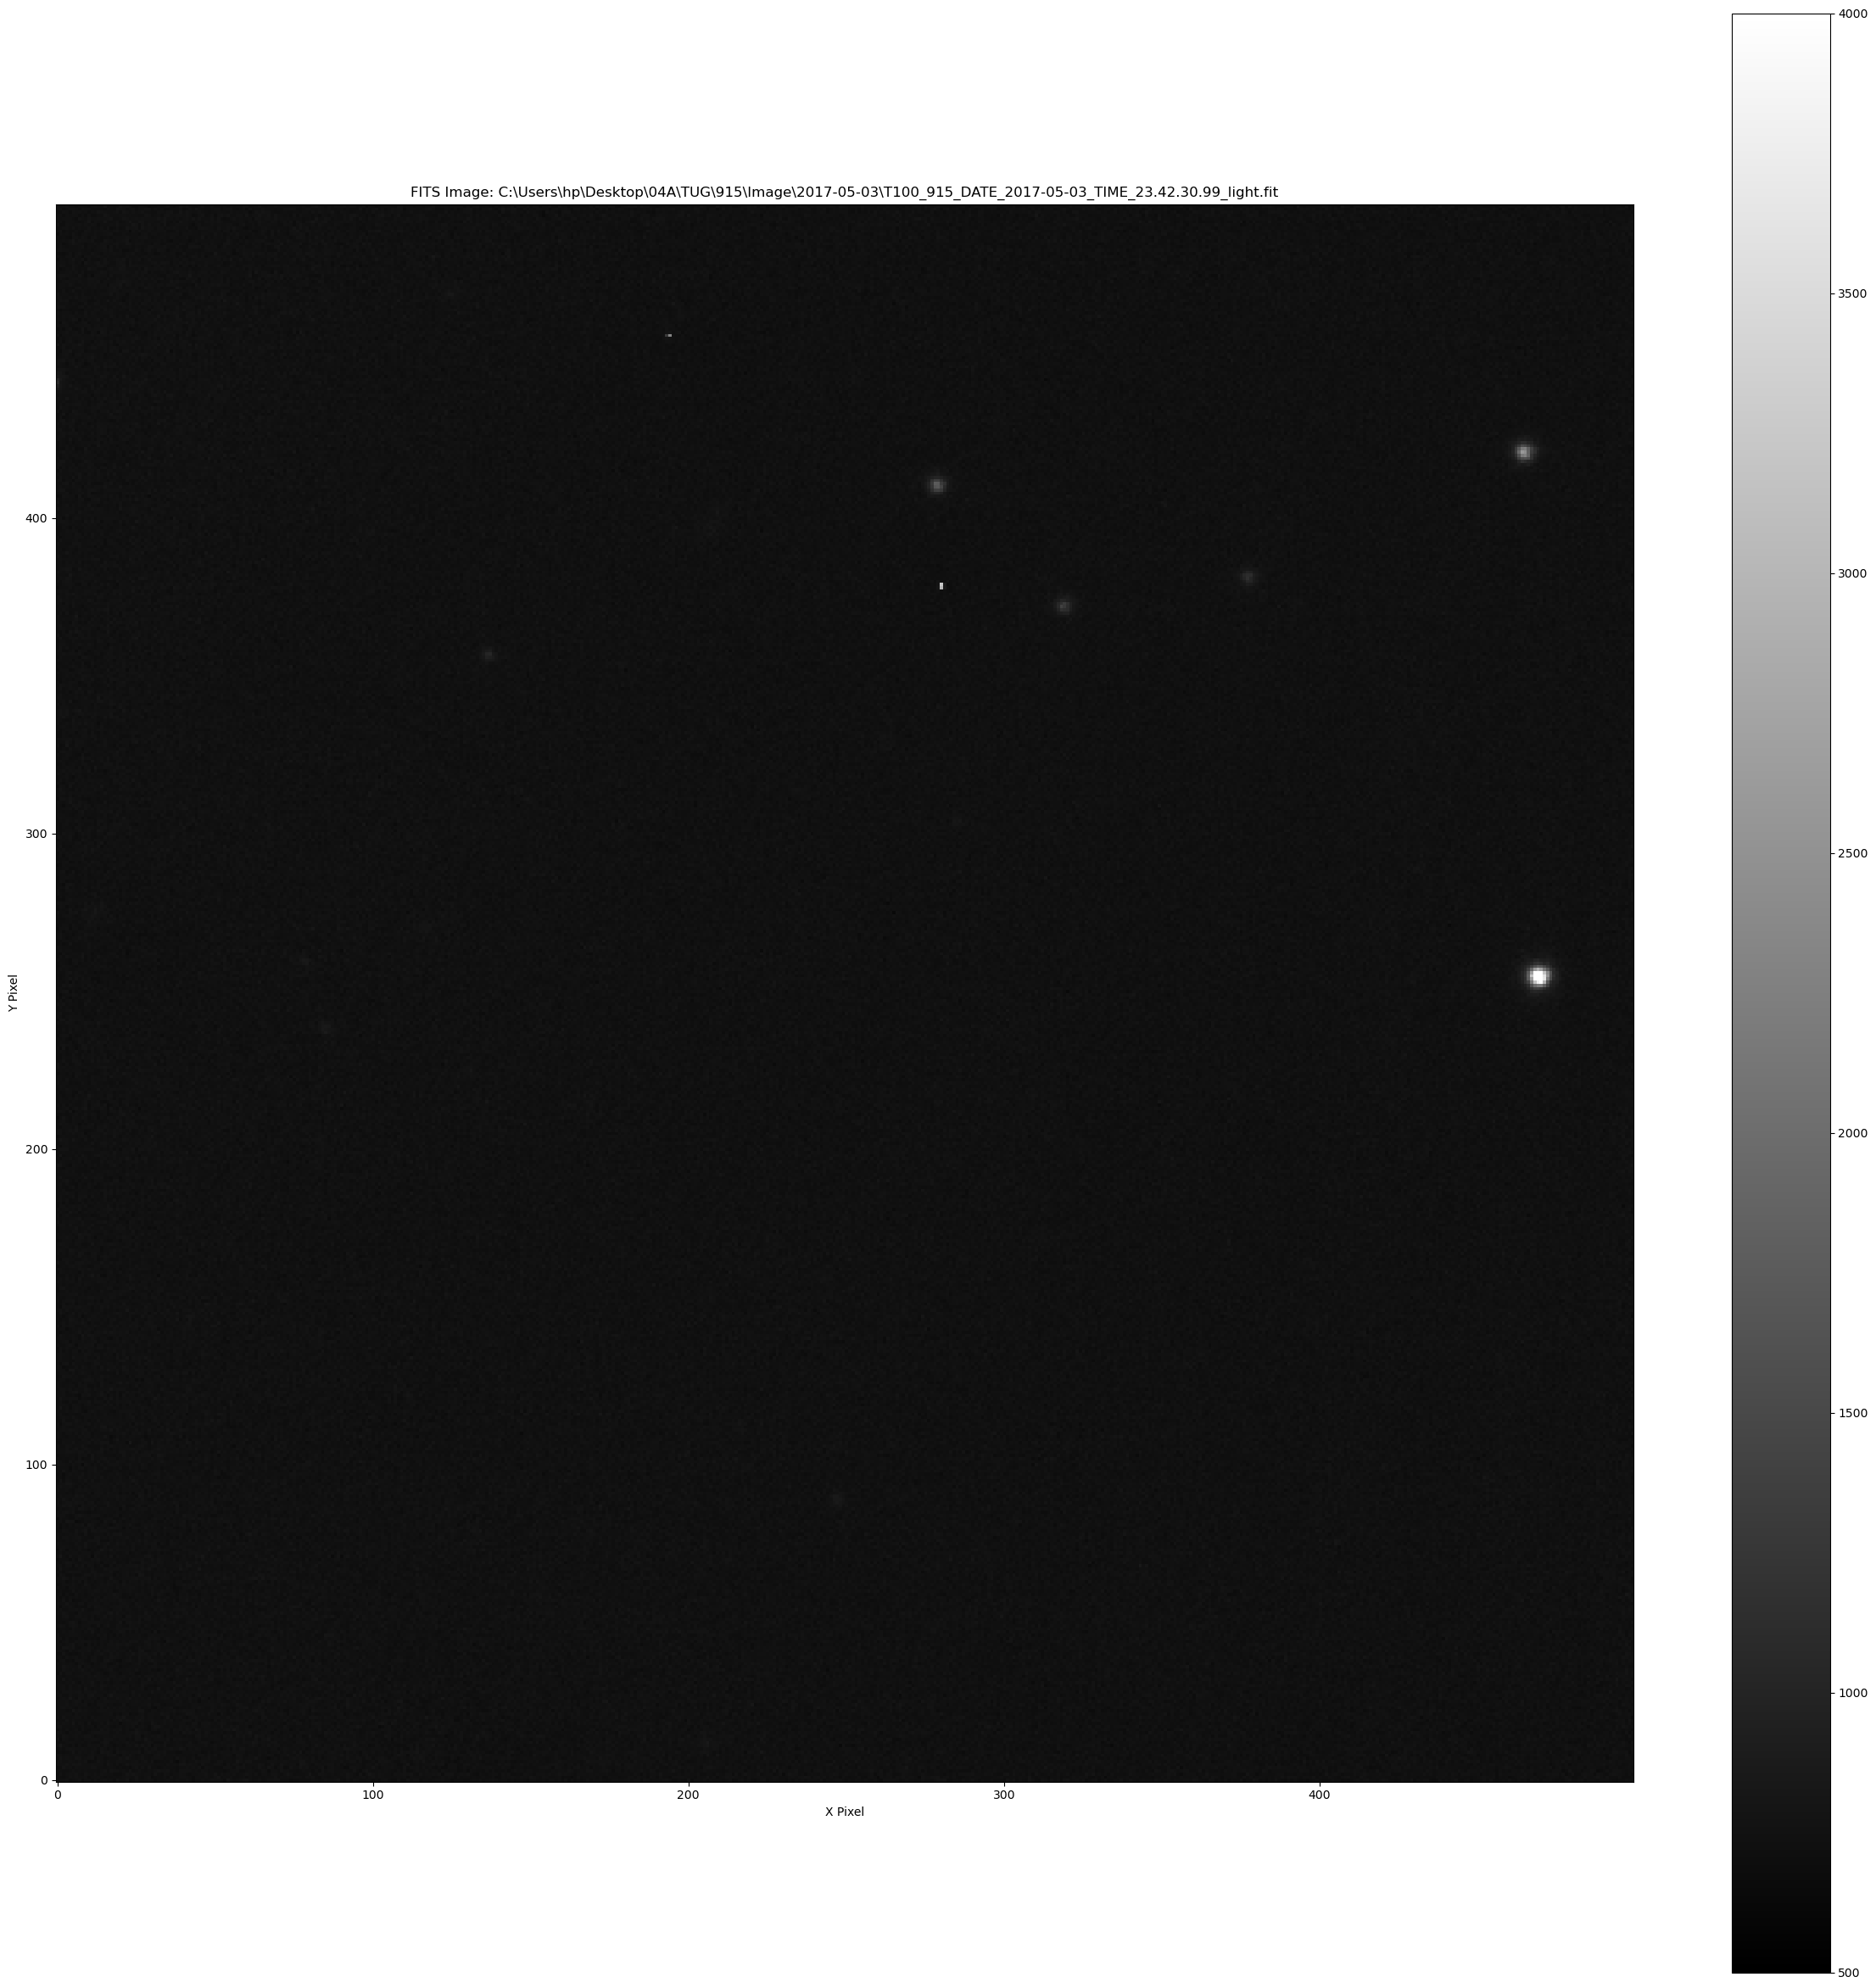

In [7]:
def view_fits_image(file_path):
    """View the image stored in a FITS file.

    Parameters:
        file_path (str): The path to the FITS file.
    """
    img = []
    try:
        # Open the FITS file
        with fits.open(file_path) as hdul:
            # Display the structure of the FITS file
            hdul.info()

            # Access the image data (usually in the first extension, index 1)
            image_data = hdul[0].data if len(hdul) > 1 else hdul[0].data
            #image_data[np.isnan(image_data)] = 0
            #image_data[image_data < 40000] = 0
            #print(np.mean(image_data))
            # Check if image data is present
            print(image_data)
            
            if image_data is None:
                print("No image data found in the FITS file.")
                return
            # Plot the image dat
            plt.figure(figsize=(30,30))
            plt.imshow((image_data)[1000:1500, 1500:2000], cmap='gray', origin='lower', vmin=500, vmax=4000)
            plt.colorbar()
            plt.title(f"FITS Image: {file_path}")
            plt.xlabel("X Pixel")
            plt.ylabel("Y Pixel")
            plt.show()
            return image_data
    except Exception as e:
        print(f"An error occurred while reading the FITS file: {e}")
    
# Example usageC:\Users\hp\Desktop\mastDownload\HST\hst_8698_25_wfpc2_pc_f606w_u65l25
file_path = "C:\\Users\\hp\\Desktop\\04A\\TUG\\915\\Image\\2017-05-03\\T100_915_DATE_2017-05-03_TIME_23.42.30.99_light.fit"
img = view_fits_image(file_path)